In [1]:
import pandas as pd
import numpy as np
import nltk  
from bs4 import BeautifulSoup
import re
from textblob import TextBlob

nltk.download('stopwords')  
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paluc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# file_name = "sarcasm_tweets.txt"
# data = uploaded[file_name].decode("utf-8").split('\r')

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
# file_name = "nonsarcasm_tweets.txt"
# data_non = uploaded[file_name].decode("utf-8").split('\n')

In [6]:
data = [line.strip() for line in open("C:/Users/paluc/Downloads/Major2020/Code_web_all/sarcasm_tweets.txt", 'r', encoding="utf-8")]

In [7]:
#data

In [8]:
data_non = [line.strip() for line in open("C:/Users/paluc/Downloads/Major2020/Code_web_all/nonsarcasm_tweets.txt", 'r', encoding="utf-8")]

In [9]:
#data_non

In [10]:
data_non[:] = [x for x in data_non if x]

In [11]:
#data_non

In [12]:
df = pd.DataFrame(data,columns=["tweets"])

In [13]:
print(len(data))
len(data_non)

2353


1401

In [14]:
all_tweets=[]
all_tweets.extend(data)
all_tweets.extend(data_non)

In [15]:
len(data)

2353

In [16]:
len(all_tweets)

3754

# Feature Extraction:

In [17]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [18]:
def cleaning(file):
    cleaned_text=[]

    stop_words = set(stopwords.words('english')) 

    for tweet in range(0, len(file)):  
        newString = file[tweet]
   
        newString = BeautifulSoup(newString, "lxml").text
        newString = re.sub(r'NAME', '', newString)
        newString = re.sub(r'HYPERLINK', '', newString)
        newString = newString.lower()
    
        newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
        newString = re.sub(r"'s\b","", newString)
        newString = re.sub("[^a-zA-Z]", " ", newString)    

        tokens = [w for w in newString.split() if not w in stop_words]
        newString = (" ".join(tokens)).strip()   
    
        cleaned_text.append(newString)

    return cleaned_text  

In [19]:
cleaned_sarcastic = cleaning(data)
#cleaned_sarcastic   

C:\Users\paluc\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [20]:
cleaned_non_sarcastic = cleaning(data_non)
#cleaned_non_sarcastic      

In [21]:
cleaned_tweets = cleaning(all_tweets)
#cleaned_tweets

In [22]:
def vowel_repetition(text):
    vowel_repeated_count = 0
    i=0
    length_Answer = len(text)
    for i in range(length_Answer-1):
        if text[i] in ['a','e','i','o','u']:
            #we check if it's followed by the same vowel
            if text[i+1] == text[i]:
                vowel_repeated_count+=1

    if vowel_repeated_count>2:
        return 1
    else:
        return 0

In [23]:
e_marks=[]
q_marks=[]
cap_words=[]
vowel_rep=[]   #true=1, false=0
slang_words=[]

In [24]:
def pragmatic_feature_extractor(text):
    e_marks=[]
    q_marks=[]
    cap_words=[]
    vowel_rep=[]   #true=1, false=0
    slang_words=[]

    for line in text:
        qm=0
        em=0
        cp=0
        sw=0
        for word in line.split():
            #print(word)
            if(word=='?'):
                qm+=1;
            if(word=='!'):
                em+=1;
            if(word.isupper() and word!='NAME' and word!='HYPERLINK'):
                cp+=1;
            wordl = word.lower()
            if(wordl=='lol' or wordl=='lmao' or wordl=='gee' or wordl=='duh'):
                sw+=1

        q_marks.append(qm)
        e_marks.append(em)
        cap_words.append(cp)
        slang_words.append(sw)
        vowel_rep.append(vowel_repetition(line))
    list_of_tuples=list(zip(q_marks,e_marks,cap_words,slang_words,vowel_rep))
    cols=['qMarksCount','eMarksCount','capWordsCount','slangWordsCount','vowelsRepCount']
    #print("here")
    PragFeatures = pd.DataFrame(list_of_tuples, columns=cols)

    return PragFeatures  

In [25]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True,min_df=3)
tfidf_vectorizer.fit(cleaned_tweets)
        

TfidfVectorizer(min_df=3)

In [26]:
def lexical_feature_extractor(text):
    print(text)
    tfidf_vectorizer_vectors=(tfidf_vectorizer.transform(text)).toarray()
    
    #print(tfidf_vectorizer_vectors.shape)
    #print(tfidf_vectorizer_vectors)

    voc = tfidf_vectorizer.vocabulary_
    cols = list(voc.keys())
    
    data1 = pd.DataFrame(tfidf_vectorizer_vectors,columns=cols)
    return data1

In [27]:
def linguistic_feature_extractor(text):
    Polarity=[]
    PosCount=[]
    NegCount=[]
    AltCount = []
    prev = -1
    for tweet in text:
        words = tweet.split(" ")
        Polarity.append(TextBlob(tweet).polarity)
        PCount=0
        NCount=0
        ACount=0
        for word in words:
            score = TextBlob(word).sentiment
            if(score.polarity>0):
                PCount+=1
                if(prev==0):
                    ACount+=1 
                    prev = 1
            elif(score.polarity<0):
                NCount+=1
                if(prev==1):
                    ACount+=1
                    prev = 0
      
    
        PosCount.append(PCount)
        NegCount.append(NCount)
        AltCount.append(ACount)

    list_of_tuples = list(zip(PosCount, NegCount,Polarity,AltCount))  
    cols = ['positiveCount','NegativeCount','SentencePolarity','AltSentimentCount']
    LingFeatures = pd.DataFrame(list_of_tuples,columns=cols)
    return LingFeatures  

    

In [28]:
#Polarity,PosCount,NegCount,AltCount = linguistic_feature_extractor(data) 

In [29]:
#list_of_tuples = list(zip(PosCount, NegCount,Polarity,AltCount))  
#cols = ['positiveCount','NegativeCount','SentencePolarity','AltSentimentCount']

In [30]:
#dataframe = pd.DataFrame(list_of_tuples,columns=cols)

In [31]:
#dataframe

In [32]:
def feature_extractor(tweets):
    #main function in which we'll call pragmatic_feature_extractor, lexical and linguistic and join all and return dataframe

    PragFeatures = pragmatic_feature_extractor(tweets)
    LingFeatures = linguistic_feature_extractor(tweets)
    LexFeatures= lexical_feature_extractor(tweets)
    combined_features =  pd.concat([PragFeatures,LexFeatures,LingFeatures],axis=1)
    return combined_features

In [33]:
features = feature_extractor(all_tweets);
#features

['Lol just got a new hairstyle its short and curly :3 VERY PUNK', 'Heard on radio this morning that the overweight issue in the U . S . is a result of not digesting GM crops . Seriously ?  96ozcoke ? ? ?', 'Shocking ! ! HYPERLINK', 'Garrett finally smiled , for the first time in a long while . "Who\'s having the psychotic episode , now ? "  amwriting  scifi', 'God I love rush hour on the CTA  peoplesuck', "Sixers acquire Anthony , futre 2nd rnd pick from Rockets . Wait for '30 draft when PHI have 15 1st & amp;10 2nd rnd picks .  TrustTheProcess", 'Ummm because cars are the way of the future . You can fit more people in a car than a train carriage . Derr . HYPERLINK', 'NAME how dare you stand up for the privacy of your customers !  IStandWithApple', 'NAME NAME i know u been a 🐶 this is what happens wen  NationalDrinkWineDay turns into lets finish all the wine day😆😄', 'NAME nice header photo  D-RoseSucks  Savage 🔥🔥🔥', "NAME think it's enough for little richy pitino to keep his job ?", 'M

# Classifiers used:

## Logistic Regression

In [34]:
y_one = np.ones(2353)

In [35]:
y_zeros = np.zeros(1401)

In [36]:
y = np.concatenate([y_one,y_zeros],axis=0)

In [37]:
Y =y.reshape(-1,1)

In [38]:
print(len(Y))
len(features)
X=features.values

3754


In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 0)

In [40]:
LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR.fit(X_train,Y_train)
y_pred_log = LR.predict(X_test)

C:\Users\paluc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(classification_report(Y_test,y_pred_log))
print("Accuracy:", accuracy_score(Y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79       366
         1.0       0.83      0.98      0.89       573

    accuracy                           0.86       939
   macro avg       0.89      0.83      0.84       939
weighted avg       0.87      0.86      0.85       939

Accuracy: 0.8594249201277955


In [42]:
model_file_path = "LR_model.pkl"

pickle.dump(LR, open(model_file_path, 'wb'))

## Naive Bayes

In [43]:
naive = GaussianNB(priors=None, var_smoothing=1e-09)
naive.fit(X_train,Y_train)
y_pred_naive = naive.predict(X_test)
#y_pred_naive

C:\Users\paluc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
print(classification_report(Y_test,y_pred_naive))
print("Accuracy:", accuracy_score(Y_test,y_pred_naive))

              precision    recall  f1-score   support

         0.0       0.69      0.83      0.75       366
         1.0       0.88      0.76      0.82       573

    accuracy                           0.79       939
   macro avg       0.78      0.80      0.78       939
weighted avg       0.80      0.79      0.79       939

Accuracy: 0.7891373801916933


In [45]:
model_file_path = "NB_model.pkl"

pickle.dump(naive, open(model_file_path, 'wb'))

## Random Forest

In [46]:
randomfor = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
randomfor.fit(X_train,Y_train)
y_pred_random = randomfor.predict(X_test)

C:\Users\paluc\AppData\Local\Temp\ipykernel_6368\2278060102.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomfor.fit(X_train,Y_train)


In [47]:
print(classification_report(Y_test,y_pred_random))
print("Accuracy:", accuracy_score(Y_test,y_pred_random))

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83       366
         1.0       0.85      0.98      0.91       573

    accuracy                           0.88       939
   macro avg       0.91      0.86      0.87       939
weighted avg       0.89      0.88      0.88       939

Accuracy: 0.8849840255591054


In [48]:
model_file_path = "RF_model.pkl"

pickle.dump(randomfor, open(model_file_path, 'wb'))

## Support Vector Machine

In [49]:
svm = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

C:\Users\paluc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
print(classification_report(Y_test,y_pred_svm))
print("Accuracy:", accuracy_score(Y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      0.55      0.70       366
         1.0       0.78      0.99      0.87       573

    accuracy                           0.82       939
   macro avg       0.88      0.77      0.79       939
weighted avg       0.86      0.82      0.81       939

Accuracy: 0.820021299254526


In [51]:
model_file_path = "SVM_model.pkl"

pickle.dump(svm, open(model_file_path, 'wb'))

# Confusion matrices:

Logistic Regression: 


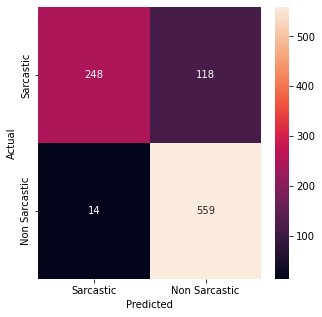

In [52]:
print("Logistic Regression: ")
conf_mat = confusion_matrix(Y_test, y_pred_log)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Sarcastic','Non Sarcastic'], yticklabels=['Sarcastic','Non Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Naive Bayes: 


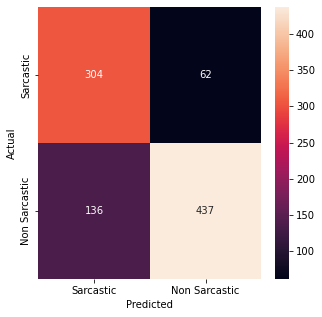

In [53]:
print("Naive Bayes: ")
conf_mat = confusion_matrix(Y_test, y_pred_naive)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Sarcastic','Non Sarcastic'], yticklabels=['Sarcastic','Non Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Random Forest: 


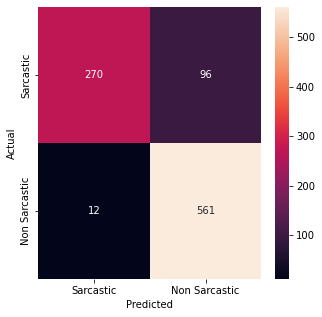

In [54]:
print("Random Forest: ")
conf_mat = confusion_matrix(Y_test, y_pred_random)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Sarcastic','Non Sarcastic'], yticklabels=['Sarcastic','Non Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Support Vector Machine: 


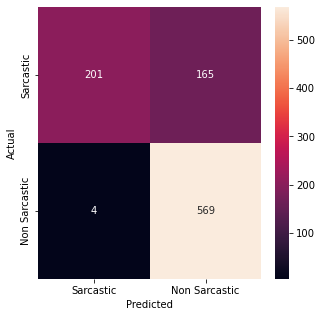

In [55]:
print("Support Vector Machine: ")
conf_mat = confusion_matrix(Y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Sarcastic','Non Sarcastic'], yticklabels=['Sarcastic','Non Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# INDIVIDUAL TESTING

In [56]:
def SampleTesting(text):
    extracted_features = feature_extractor(text)
    X = extracted_features.values
    ypred_lr = LR.predict(X)
    print("class predicted by Logistic Regression",ypred_lr)
    ypred_naive = naive.predict(X)
    print("class predicted by Naive Bayes",ypred_naive)
    ypred_random = randomfor.predict(X)
    print("class predicted by Random Forest",ypred_random)
    ypred_support = svm.predict(X)
    print("class predicted by Support Vector Machine",ypred_support)

In [57]:
sentence = ["This is going to be soooo  fun!!!!"]
SampleTesting(sentence)

['This is going to be soooo  fun!!!!']
class predicted by Logistic Regression [1.]
class predicted by Naive Bayes [1.]
class predicted by Random Forest [1.]
class predicted by Support Vector Machine [1.]


In [58]:
def Testing(text):
    text = cleaning(text)
    extracted_features = feature_extractor(text)
    X_f = extracted_features.values
    return X_f

In [59]:
f = Testing(sentence)
f

['going soooo fun']


array([[0. , 0. , 0. , ..., 0. , 0.3, 0. ]])

In [60]:
f_res = LR.predict(f)

In [61]:
print(f_res)

[1.]


In [62]:
f_res.shape

(1,)